## Project 2 - Regression Task

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

### Loading the csv file from Project 1 which was created by exporting the dataset with one-hot encoding perfomed

In [3]:
dt = pd.read_csv("data1.csv")

In [4]:
df = pd.DataFrame(dt)

In [5]:
df.shape

(2017, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
id                  2017 non-null int64
acousticness        2016 non-null float64
danceability        2015 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    1978 non-null float64
key                 2015 non-null float64
liveness            2016 non-null float64
loudness            2017 non-null float64
mode                1995 non-null float64
speechiness         2017 non-null float64
tempo               2016 non-null float64
time_signature      1984 non-null float64
valence             2016 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(12), int64(3), object(2)
memory usage: 268.0+ KB


In [7]:
df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2.0,0.1650,-8.795,1.0,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1.0,0.1370,-10.401,1.0,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2.0,0.1590,-7.148,1.0,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5.0,0.0922,-15.236,1.0,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5.0,0.4390,-11.648,0.0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [8]:
df.tail()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2012,2012,0.00106,0.584,274404,0.932,0.002690,1.0,0.1290,-3.501,1.0,0.333,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1.0,0.0528,-2.663,1.0,0.131,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0.0,0.2140,-2.467,1.0,0.107,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1.0,0.0913,-2.735,1.0,0.133,150.011,4.0,0.623,0,First Contact,Twin Moons
2016,2016,0.00281,0.446,204520,0.915,0.000039,9.0,0.2180,-6.221,1.0,0.141,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers


In [9]:
df.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2016.000000,2015.000000,2.017000e+03,2017.000000,1978.000000,2015.000000,2016.000000,2017.000000,1995.00000,2017.000000,2016.000000,1984.000000,2016.000000,2017.000000
mean,1008.000000,0.187678,0.618478,2.463062e+05,0.681577,0.135335,5.347891,0.190888,-7.085624,0.61604,0.092664,121.607967,3.967742,0.496683,0.505702
std,582.402066,0.260024,0.161029,8.198181e+04,0.210273,0.274875,3.646163,0.155479,3.761684,0.48647,0.089931,26.691391,0.257940,0.247186,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.00000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009590,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092275,-8.394000,0.00000,0.037500,100.164000,4.000000,0.295000,0.000000
50%,1008.000000,0.063500,0.631000,2.292610e+05,0.715000,0.000093,6.000000,0.127000,-6.248000,1.00000,0.054900,121.468000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.056600,9.000000,0.247000,-4.746000,1.00000,0.108000,137.860500,4.000000,0.690250,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.00000,0.816000,219.331000,5.000000,0.992000,1.000000


In [10]:
df.dtypes

id                    int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

### Checking for missing data and imputing

In [11]:
df.isnull().sum()

id                   0
acousticness         1
danceability         2
duration_ms          0
energy               0
instrumentalness    39
key                  2
liveness             1
loudness             0
mode                22
speechiness          0
tempo                1
time_signature      33
valence              1
target               0
song_title           0
artist               0
dtype: int64

In [12]:
print(df['acousticness'].mean())

0.187677678288691


In [13]:
df['acousticness'].fillna(0.1876,inplace=True)

In [14]:
print(df['danceability'].mean())

0.6184779156327529


In [15]:
df['danceability'].fillna(0.6185,inplace=True)

In [16]:
print(df['instrumentalness'].mean())

0.1353349620424672


In [17]:
df['instrumentalness'].fillna(0.1353,inplace=True)

In [18]:
print(df['key'].mean())

5.347890818858561


In [19]:
df['key'].fillna(0.3479,inplace=True)

In [20]:
print(df['liveness'].mean())

0.19088759920634923


In [21]:
df['liveness'].fillna(0.1909,inplace=True)

In [22]:
df['mode'].fillna(0,inplace=True)

In [23]:
print(df['tempo'].mean())

121.60796726190478


In [24]:
df['tempo'].fillna(121.6080,inplace=True)

In [25]:
df['time_signature'].fillna(3,inplace=True)

In [26]:
print(df['valence'].mean())

0.49668298611111134


In [27]:
df['valence'].fillna(0.4969,inplace=True)

In [28]:
df.dtypes

id                    int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [29]:
df.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [30]:
df.drop(['song_title','artist'],axis=1,inplace=True)

In [31]:
df.shape

(2017, 15)

In [32]:
X = df.drop('energy',axis = 1).values
y = df.energy.values

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [33]:
X_train_org.shape
X_test_org.shape

(1512, 14)

(505, 14)

In [34]:
y_train.shape
y_test.shape

(1512,)

(505,)

In [35]:
scaler = StandardScaler()

In [36]:
X_train_scale = scaler.fit_transform(X_train_org)

In [37]:
X_test_scale = scaler.transform(X_test_org)

In [38]:
X_train_scale.shape

(1512, 14)

## Any Two Models with Bagging

### Lasso Regression with Bagging

In [39]:
from sklearn.ensemble import BaggingRegressor

lass = Lasso(alpha = 10)
bag_clf = BaggingRegressor(lass,n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)
bag_clf.fit(X_train_org, y_train)
y_pred = bag_clf.predict(X_test_org)

bag_clf.score(X_train_org, y_train)
bag_clf.score(X_test_org, y_test)

BaggingRegressor(base_estimator=Lasso(alpha=10, copy_X=True, fit_intercept=True,
                                      max_iter=1000, normalize=False,
                                      positive=False, precompute=False,
                                      random_state=None, selection='cyclic',
                                      tol=0.0001, warm_start=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=None, oob_score=True,
                 random_state=0, verbose=0, warm_start=False)

0.026250281138522458

0.01278719026607511

### Lasso Regression with Bagging Summary:

#### Train Score : 0.0263

#### Test Score : 0.0128

## KNN Regression with Bagging

In [40]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 10)
bag_clf = BaggingRegressor(knn,n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)
bag_clf.fit(X_train_scale, y_train)

bag_clf.score(X_train_scale, y_train)
bag_clf.score(X_test_scale, y_test)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=10,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=None, oob_score=True,
                 random_state=0, verbose=0, warm_start=False)

0.4941513795676028

0.4731040675252591

### KNN Regression with Bagging Summary:

#### Train Score : 0.4952

#### Test Score : 0.4731

## Any Two Models with Pasting

### Lasso Regression with Pasting

In [41]:
from sklearn.ensemble import BaggingRegressor

lass = Lasso(alpha = 10)
bag_clf = BaggingRegressor(lass,n_estimators=500, max_samples=100, bootstrap=False, random_state=0)
bag_clf.fit(X_train_org, y_train)
y_pred = bag_clf.predict(X_test_org)

bag_clf.score(X_train_org, y_train)
bag_clf.score(X_test_org, y_test)

BaggingRegressor(base_estimator=Lasso(alpha=10, copy_X=True, fit_intercept=True,
                                      max_iter=1000, normalize=False,
                                      positive=False, precompute=False,
                                      random_state=None, selection='cyclic',
                                      tol=0.0001, warm_start=False),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=None,
                 oob_score=False, random_state=0, verbose=0, warm_start=False)

0.02604699279137257

0.012695873289432003

### Lasso Regression with Pasting Summary:

#### Train Score : 0.0260

#### Test Score : 0.0127

## KNN Regression with Pasting 

In [42]:
bag_clf = BaggingRegressor(knn,n_estimators=500, max_samples=100, bootstrap=False, random_state=0)
bag_clf.fit(X_train_scale, y_train)

bag_clf.score(X_train_scale, y_train)
bag_clf.score(X_test_scale, y_test)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=10,
                                                    p=2, weights='uniform'),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=None,
                 oob_score=False, random_state=0, verbose=0, warm_start=False)

0.49435491844351365

0.4744172517512019

### KNN Regression with Pasting Summary:

#### Train Score : 0.4944

#### Test Score : 0.4744

## Any Two Models with AdaBoost Boosting

## KNN Regression with AdaBoosting 

In [43]:
from sklearn.ensemble import AdaBoostRegressor
param_grid = {'learning_rate': [0.1,0.5,1.0]}
ada_clf = AdaBoostRegressor(knn,n_estimators=100)
GridSearch_dtclf = GridSearchCV(ada_clf, param_grid,cv=4,return_train_score=True,n_jobs= -1)

GridSearch_dtclf.fit(X_train_scale, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                            leaf_size=30,
                                                                            metric='minkowski',
                                                                            metric_params=None,
                                                                            n_jobs=None,
                                                                            n_neighbors=10,
                                                                            p=2,
                                                                            weights='uniform'),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=100, random_state=None),
             iid='warn', n_jobs=-1,
             param_grid=

In [44]:
GridSearch_dtclf.best_params_
GridSearch_dtclf.best_score_

{'learning_rate': 0.1}

0.6463954524078758

In [45]:
result_lasso_ada= pd.DataFrame(GridSearch_dtclf.cv_results_)
result_lasso_ada

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,12.941914,1.197473,4.558397,0.507606,0.1,{'learning_rate': 0.1},0.662366,0.629662,0.610999,0.682555,0.646395,0.027818,1,0.716094,0.715087,0.724796,0.718920,0.718724,0.003777
1,13.255297,1.029731,4.343195,0.536311,0.5,{'learning_rate': 0.5},0.608042,0.599223,0.572941,0.638718,0.604731,0.023489,2,0.710476,0.703588,0.711082,0.712052,0.709299,0.003345
2,11.176421,0.145644,3.610247,0.031988,1,{'learning_rate': 1.0},0.574766,0.566201,0.553716,0.578739,0.568355,0.009590,3,0.704660,0.694765,0.699175,0.706469,0.701267,0.004616


In [46]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(knn,n_estimators=100,learning_rate = 0.1)
ada_clf.fit(X_train_scale, y_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None,
                                                     n_neighbors=10, p=2,
                                                     weights='uniform'),
                  learning_rate=0.1, loss='linear', n_estimators=100,
                  random_state=None)

In [47]:
ada_clf.score(X_train_scale, y_train)
ada_clf.score(X_test_scale, y_test)

0.7304639897088798

0.6206149033426653

### KNN Regression with AdaBoosting Summary:

#### Train Score: 0.7309

#### Test Score : 0.6208

## Lasso Regression with AdaBoosting

In [48]:
ada_clf = AdaBoostRegressor(lass, n_estimators=200, learning_rate=0.25, random_state=0)
ada_clf.fit(X_train_org, y_train)
ada_clf.score(X_train_org, y_train)
ada_clf.score(X_test_org, y_test)

AdaBoostRegressor(base_estimator=Lasso(alpha=10, copy_X=True,
                                       fit_intercept=True, max_iter=1000,
                                       normalize=False, positive=False,
                                       precompute=False, random_state=None,
                                       selection='cyclic', tol=0.0001,
                                       warm_start=False),
                  learning_rate=0.25, loss='linear', n_estimators=200,
                  random_state=0)

0.009918388730553174

0.0006879092368200501

### Lasso Regression with AdaBoosting Summary:

#### Train Score : 0.0010

#### Test Score : 0.0007

## Gradient Boosting

In [49]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train_org, y_train)
gbrt.score(X_train_org, y_train)
gbrt.score(X_test_org, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

0.6640871021163337

0.5962221753355985

### Gradient Boosting Summary:

#### Train Score : 0.6641

#### Test Score : 0.5962

## PCA

In [50]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train_scale)

pca.explained_variance_ratio_

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

array([0.16659688, 0.14877009, 0.10295812, 0.08532472, 0.07466868,
       0.07290634, 0.06676584, 0.06103421, 0.05702312, 0.0507846 ,
       0.04395671, 0.03402998, 0.0257594 , 0.00942131])

12

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 12)
X_train_pca = pca.fit_transform(X_train_scale)
np.sum(pca.explained_variance_ratio_)

0.9648192893827919

In [52]:
X_train_pca = pca.fit_transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)

In [53]:
X_train_pca.shape

(1512, 12)

## Linear Regression

In [54]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'normalize':[True,False]}
grid_search_lr = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search_lr.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lr.best_score_))

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None, param_grid={'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'normalize': True}
Best cross-validation score: 0.6896


In [55]:
results = pd.DataFrame(grid_search_lr.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.001995,0.002701,0.000332,0.000470,True,{'normalize': True},0.661082,0.71059,0.696742,0.684643,...,0.022738,1,0.701258,0.691337,0.694974,0.697246,0.689739,0.701158,0.695952,0.004431
1,0.000666,0.000471,0.000156,0.000349,False,{'normalize': False},0.661082,0.71059,0.696742,0.684643,...,0.022738,1,0.701258,0.691337,0.694974,0.697246,0.689739,0.701158,0.695952,0.004431


In [56]:
lreg = LinearRegression(normalize = True)
lreg.fit(X_train_pca, y_train)
print(lreg.score(X_train_pca, y_train))
lr_test_score = lreg.score(X_test_pca, y_test)
lr_test_score

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

0.6955555494598618


0.6804722704510557

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(lreg , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(lreg , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.66108153 0.71059016 0.69674248 0.68464346 0.72205373 0.66277875]
0.6896483521426454


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Text(0.5, 0, 'sqft_living')

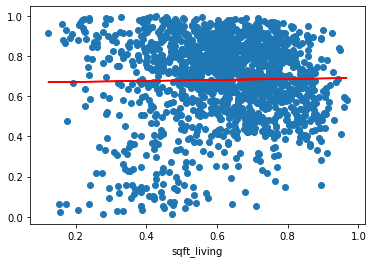

In [58]:
#PLOT

%matplotlib inline
import matplotlib.pyplot as plt

#X_train_array = X_train_org.to_numpy()

#X_train_rm = X_train_array[:,2].reshape(-1,1)

X_train_rm = X_train_org[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('sqft_living')

### Linear Regression Summary:

#### Train Score: 0.6956

#### Test Score: 0.6805

#### Best Parameter: {'normalize' : True}

#### Best Cross - Validation Score: 0.6896

## KNN Regression

In [59]:
grid_parms_knn = {'n_neighbors':[1,5,10,15,20]}

In [60]:
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, grid_parms_knn,cv=6,return_train_score=True,n_jobs= -1)
grid_search_knn.fit(X_train_pca, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [61]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_knn.best_score_))
pd.DataFrame(grid_search_knn.cv_results_)

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.6258


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.002161,0.000373,0.015616,0.001091,1,{'n_neighbors': 1},0.421427,0.551229,0.223191,0.391405,...,0.096931,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003296,0.001285,0.022123,0.002130,5,{'n_neighbors': 5},0.598767,0.669548,0.571707,0.595195,...,0.032168,4,0.731695,0.716498,0.730200,0.737697,0.729229,0.738841,0.730693,0.007307
2,0.001962,0.000041,0.017633,0.002982,10,{'n_neighbors': 10},0.605140,0.676069,0.611738,0.594942,...,0.029701,1,0.691941,0.674760,0.691221,0.693407,0.684805,0.693201,0.688223,0.006676
3,0.002614,0.000448,0.023276,0.004524,15,{'n_neighbors': 15},0.617311,0.660565,0.621157,0.576819,...,0.028162,2,0.670320,0.660114,0.664472,0.668015,0.661883,0.671819,0.666104,0.004290
4,0.002201,0.000805,0.021127,0.004243,20,{'n_neighbors': 20},0.617206,0.647748,0.620677,0.573904,...,0.025157,3,0.651788,0.642357,0.647282,0.655603,0.642972,0.655733,0.649289,0.005472


In [62]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train_pca, y_train)
print(knn.score(X_train_pca, y_train))
knn_test_score_ = knn.score(X_test_pca, y_test)
knn_test_score_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

0.6913540757064955


0.6045806851814914

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.60514031 0.67606942 0.61173799 0.59494206 0.65667458 0.61044463]
0.625834831477951


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

Text(0.5, 0, 'sqft_living')

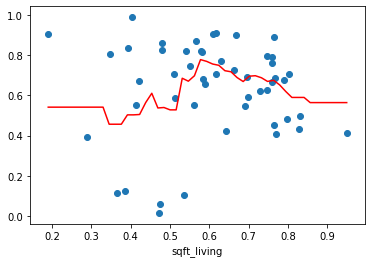

In [64]:
X_b = X_train_org[:50,2].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(10)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('sqft_living')

### KNN Regression Summary:

#### Train Score: 0.6914

#### Test Score: 0.6046

#### Best parameters: {'n_neighbors' : 10}

#### Best Cross - Validation Score: 0.6258

## Ridge Regression

In [65]:
grid_parms_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [66]:
ridge = Ridge()
grid_search_ridge = GridSearchCV(estimator = ridge,param_grid = grid_parms_ridge,return_train_score=True,n_jobs= -1,cv=5)
grid_search_ridge.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_ridge.best_params_))

print("Best cross-validation score: {:.4f}".format(grid_search_ridge.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'alpha': 10}
Best cross-validation score: 0.6885


In [67]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_pca, y_train)
print(ridge.score(X_train_pca, y_train))
ridge_test_score_ = ridge.score(X_test_pca, y_test)
ridge_test_score_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

0.6955553286395487


0.6804586139054339

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(ridge , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(ridge , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.66115431 0.71057115 0.69672738 0.68461466 0.72205333 0.66280047]
0.6896535501606035


In [69]:
result_ridge = pd.DataFrame(grid_search_ridge.cv_results_)
result_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012731,0.001383,0.000983,0.000135,0.01,{'alpha': 0.01},0.647629,0.717941,0.682919,0.699654,...,0.688448,0.023364,4,0.705899,0.688213,0.697795,0.693616,0.695159,0.696137,0.005799
1,0.005174,0.003452,0.000723,0.000365,0.1,{'alpha': 0.1},0.647634,0.717941,0.682914,0.699656,...,0.688449,0.023362,3,0.705899,0.688213,0.697795,0.693616,0.695159,0.696137,0.005799
2,0.000798,0.000399,0.000676,0.000570,1,{'alpha': 1},0.647687,0.717943,0.682866,0.699677,...,0.688453,0.023348,2,0.705898,0.688213,0.697795,0.693616,0.695159,0.696136,0.005799
3,0.000707,0.000737,0.000610,0.000499,10,{'alpha': 10},0.648176,0.717929,0.682366,0.699848,...,0.688463,0.023211,1,0.705864,0.688178,0.697764,0.693581,0.695127,0.696103,0.005799
4,0.000786,0.000394,0.000627,0.000515,100,{'alpha': 100},0.649827,0.715469,0.675894,0.697946,...,0.686028,0.022140,5,0.703014,0.685287,0.695220,0.690714,0.692441,0.693335,0.005825


([<matplotlib.axis.XTick at 0x1ee509197b8>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

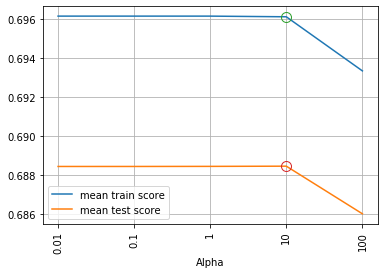

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(result_ridge.shape[0]), result_ridge['mean_train_score'], label = 'mean train score')
plt.plot(range(result_ridge.shape[0]), result_ridge['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_ridge.shape[0]), result_ridge['param_alpha'], rotation = 90)
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_train_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_test_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Ridge Regression Summary:

#### Train Score: 0.6956

#### Test Score: 0.6805

#### Best Parameters: {'alpha' : 10}

#### Best Cross - Validation Score: 0.6885

## Lasso Regression

In [71]:
grid_parms_lasso = {'alpha': [0.01, 0.1, 1, 10,100]}

In [72]:
lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator = lasso,param_grid = grid_parms_lasso,return_train_score=True,n_jobs=-1,cv=5)
grid_search_lasso.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lasso.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.6686


In [73]:
las = Lasso(alpha = 10)
las.fit(X_train_pca, y_train)
print(las.score(X_train_pca, y_train))
las_test_score_ = las.score(X_test_pca, y_test)
las_test_score_

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

0.0


-2.8005758561100436e-06

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(lass , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(lass , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[-1.95811601e-03 -9.56784282e-05 -1.26085227e-04 -8.69436647e-04
 -3.47135988e-03 -2.09627356e-04]
-0.0011217172578971146


In [75]:
result_lasso = pd.DataFrame(grid_search_lasso.cv_results_)
result_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001389,0.000533,0.000614,0.000501,0.01,{'alpha': 0.01},0.641841,0.697043,0.654978,0.682145,...,0.668594,0.019490,1,0.684492,0.665666,0.676166,0.672546,0.672109,0.674196,0.006160
1,0.001371,0.000441,0.000626,0.000458,0.1,{'alpha': 0.1},0.237759,0.282439,0.252224,0.239664,...,0.257819,0.018644,2,0.279529,0.228918,0.271879,0.276914,0.253888,0.262226,0.018906
2,0.001123,0.000380,0.000739,0.000598,1,{'alpha': 1},-0.002549,-0.000035,-0.000146,-0.000992,...,-0.000864,0.000910,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000728,0.000383,0.000715,0.000475,10,{'alpha': 10},-0.002549,-0.000035,-0.000146,-0.000992,...,-0.000864,0.000910,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000790,0.000396,0.000704,0.000401,100,{'alpha': 100},-0.002549,-0.000035,-0.000146,-0.000992,...,-0.000864,0.000910,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


([<matplotlib.axis.XTick at 0x1ee50a37e48>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

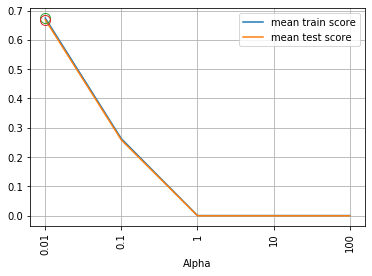

In [76]:
%matplotlib inline

plt.plot(range(result_lasso.shape[0]), result_lasso['mean_train_score'], label = 'mean train score')
plt.plot(range(result_lasso.shape[0]), result_lasso['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_lasso.shape[0]), result_lasso['param_alpha'], rotation = 90)
plt.plot([grid_search_lasso.best_index_], result_lasso['mean_train_score'][grid_search_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_lasso.best_index_], result_lasso['mean_test_score'][grid_search_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Lasso Regression Summary:

#### Train Score: 0.0

#### Test Score: -2.8006

#### Best Parameters: {'alpha' : 0.01}

#### Best Cross - Validation Score: 0.6686

## Polynomial Regression

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [78]:
param_grid_poly = {'polynomialfeatures__degree': np.arange(3)}

grid_poly = GridSearchCV(PolynomialRegression(), param_grid_poly,return_train_score=True,n_jobs=-1,cv=5)

In [79]:
grid_poly.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'polynomialfeatures__degree': array([0, 1, 2])},
             pre_dispatch='

In [80]:
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))

Best parameters: {'polynomialfeatures__degree': 2}
Best cross-validation score: 0.7070


In [81]:
pol = PolynomialFeatures(degree = 2)
X_pol = pol.fit_transform(X_train_pca)
Xt_pol = pol.fit_transform(X_test_pca)
pol_reg = LinearRegression()
pol_reg.fit(X_pol,y_train)
print(pol_reg.score(X_pol, y_train))
pol_reg_test_score = pol_reg.score(Xt_pol, y_test)
pol_reg_test_score

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.7521345246769945


0.7053224874928257

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(pol_reg , X_pol, y_train, cv=kfold)))
scores = cross_val_score(pol_reg , X_pol, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.68262275 0.75739177 0.72060185 0.69318027 0.69318301 0.68962393]
0.7061005984499915


In [83]:
result_poly = pd.DataFrame(grid_poly.cv_results_)
result_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002567,0.000376,0.001874,0.000222,0,{'polynomialfeatures__degree': 0},-0.002549,-0.000035,-0.000146,-0.000992,...,-0.000864,0.000910,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.004365,0.000564,0.001870,0.000447,1,{'polynomialfeatures__degree': 1},0.647628,0.717941,0.682920,0.699653,...,0.688448,0.023364,2,0.705899,0.688213,0.697795,0.693616,0.695159,0.696137,0.005799
2,0.016755,0.001716,0.004986,0.000889,2,{'polynomialfeatures__degree': 2},0.672797,0.764937,0.688215,0.689420,...,0.707032,0.032735,1,0.764474,0.744550,0.759428,0.754729,0.756421,0.755920,0.006579


([<matplotlib.axis.XTick at 0x1ee50ac7160>,
 <a list of 3 Text xticklabel objects>)

Text(0.5, 0, 'Degree')

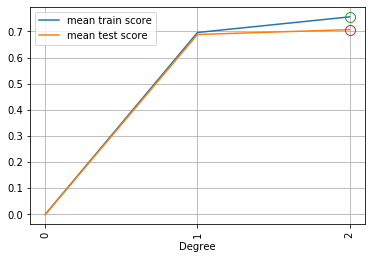

In [84]:
plt.plot(range(result_poly.shape[0]), result_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_poly.shape[0]), result_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_poly.shape[0]), result_poly['param_polynomialfeatures__degree'], rotation = 90)
plt.plot([grid_poly.best_index_], result_poly['mean_train_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_poly.best_index_], result_poly['mean_test_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.xlabel('Degree')
plt.legend()

### Polynomial Regression Summary:

#### Train Score: 0.7521

#### Test Score: 0.7053

#### Best Parameters: {'polynomialfeatures_degree' : 2}

#### Best Cross -  Validation Score: 0.7070

## Linear SVR

In [85]:
grid_parms_svrl = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon' : [0.01, 0.1, 1, 10, 100]}

In [86]:
linearsvr = LinearSVR()
grid_svrl = GridSearchCV(estimator = linearsvr,param_grid = grid_parms_svrl,return_train_score=True,n_jobs= -1,cv=10)

In [87]:
grid_svrl.fit(X_train_pca,y_train)

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [88]:
print("Best parameters: {}".format(grid_svrl.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svrl.best_score_))

Best parameters: {'C': 0.1, 'epsilon': 0.1}
Best cross-validation score: 0.6867


In [89]:
lsvr = LinearSVR(C = 0.1, epsilon = 0.1)
        
lsvr.fit(X_train_pca, y_train)

print(lsvr.score(X_train_pca, y_train))
lsvr_test_score = lsvr.score(X_test_pca, y_test)
lsvr_test_score

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=0.1, dual=True, epsilon=0.1, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

0.6948118676692552


0.6802542121945057

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(lsvr , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(lsvr, X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Cross-validation scores:
[0.6784012  0.61142764 0.75746969 0.66609235 0.72486611 0.64435077
 0.67436107 0.72612311 0.73858256 0.64564558]


C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6867527834969056


C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [91]:
result_linearsvr = pd.DataFrame(grid_svrl.cv_results_)
result_linearsvr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004972,0.000818,0.000722,0.000397,0.01,0.01,"{'C': 0.01, 'epsilon': 0.01}",0.684228,0.609148,0.751710,...,0.683043,0.695891,0.689057,0.698055,0.694044,0.688142,0.687181,0.697096,0.692741,0.005382
1,0.006087,0.001446,0.000830,0.000431,0.01,0.1,"{'C': 0.01, 'epsilon': 0.1}",0.677519,0.605177,0.748425,...,0.682220,0.695473,0.688364,0.696216,0.693590,0.687927,0.686750,0.696642,0.692001,0.005240
2,0.001592,0.000495,0.001301,0.000453,0.01,1,"{'C': 0.01, 'epsilon': 1}",-10.562007,-11.829240,-8.465385,...,-10.821266,-10.558814,-10.513738,-10.399740,-10.355896,-10.657840,-10.642934,-10.432109,-10.531052,0.137191
3,0.001822,0.000402,0.001030,0.000646,0.01,10,"{'C': 0.01, 'epsilon': 10}",-10.562007,-11.829240,-8.465385,...,-10.821266,-10.558814,-10.513738,-10.399740,-10.355896,-10.657840,-10.642934,-10.432109,-10.531052,0.137191
4,0.001097,0.000299,0.001109,0.000223,0.01,100,"{'C': 0.01, 'epsilon': 100}",-10.562007,-11.829240,-8.465385,...,-10.821266,-10.558814,-10.513738,-10.399740,-10.355896,-10.657840,-10.642934,-10.432109,-10.531052,0.137191
5,0.044006,0.008296,0.001453,0.001704,0.1,0.01,"{'C': 0.1, 'epsilon': 0.01}",0.682835,0.609998,0.757065,...,0.682932,0.695794,0.689074,0.697641,0.694499,0.687884,0.687125,0.697161,0.692699,0.005437
6,0.046222,0.018398,0.000962,0.000650,0.1,0.1,"{'C': 0.1, 'epsilon': 0.1}",0.678101,0.611903,0.757334,...,0.685222,0.697605,0.691330,0.699895,0.696579,0.690786,0.689518,0.699497,0.694924,0.005248
7,0.001310,0.000450,0.001307,0.000458,0.1,1,"{'C': 0.1, 'epsilon': 1}",-10.562007,-11.829240,-8.465385,...,-10.821266,-10.558814,-10.513738,-10.399740,-10.355896,-10.657840,-10.642934,-10.432109,-10.531052,0.137191
8,0.001605,0.000488,0.000893,0.000527,0.1,10,"{'C': 0.1, 'epsilon': 10}",-10.562007,-11.829240,-8.465385,...,-10.821266,-10.558814,-10.513738,-10.399740,-10.355896,-10.657840,-10.642934,-10.432109,-10.531052,0.137191
9,0.001650,0.000532,0.001138,0.000447,0.1,100,"{'C': 0.1, 'epsilon': 100}",-10.562007,-11.829240,-8.465385,...,-10.821266,-10.558814,-10.513738,-10.399740,-10.355896,-10.657840,-10.642934,-10.432109,-10.531052,0.137191


([<matplotlib.axis.XTick at 0x1ee50c595c0>,
 <a list of 25 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

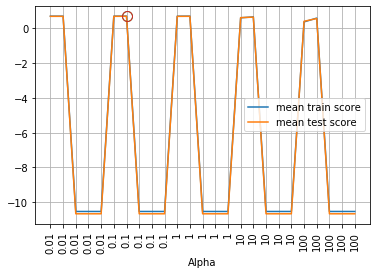

In [92]:
plt.plot(range(result_linearsvr.shape[0]), result_linearsvr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_linearsvr.shape[0]), result_linearsvr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_linearsvr.shape[0]), result_linearsvr['param_C'], rotation = 90)
plt.plot([grid_svrl.best_index_], result_linearsvr['mean_train_score'][grid_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svrl.best_index_], result_linearsvr['mean_test_score'][grid_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Linear SVR Summary:

#### Train Score: 0.6948

#### Test Score: 0.6803

#### Best Parameters: {'C': 0.1, 'epsilon': 0.1}

#### Best Cross - Validation Score: 0.6867



## SVR with Kernel 'Linear'

In [93]:
grid_parms_linear = {'C': [0.01,0.1, 1, 10, 100]}

In [94]:
svr_linear = SVR(kernel='linear')
grid_svr_linear = GridSearchCV(estimator = svr_linear,param_grid = grid_parms_linear,return_train_score=True,n_jobs= -1,cv=6)

In [95]:
grid_svr_linear.fit(X_train_pca,y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [96]:
print("Best parameters: {}".format(grid_svr_linear.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_linear.best_score_))

Best parameters: {'C': 0.01}
Best cross-validation score: 0.6899


In [97]:
svr = SVR(kernel = 'linear',C = 100)
        
        #train the model
svr.fit(X_train_pca, y_train)
        
        #evaluate the model
print(svr.score(X_train_pca, y_train))
svr_test_score = svr.score(X_test_pca, y_test)
svr_test_score

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

0.6947399660544613


0.6801070541465106

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svr , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.65766366 0.70855705 0.6969277  0.68598263 0.72559424 0.66280935]
0.6895891050826931


In [99]:
result_svr_linear = pd.DataFrame(grid_svr_linear.cv_results_)
result_svr_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.080769,0.019168,0.005298,0.000487,0.01,{'C': 0.01},0.657446,0.708318,0.698379,0.686100,...,0.024080,1,0.700408,0.690850,0.694316,0.696545,0.688417,0.700171,0.695118,0.004460
1,0.238054,0.028930,0.005519,0.000489,0.1,{'C': 0.1},0.657651,0.708209,0.697002,0.685917,...,0.023973,4,0.700392,0.690577,0.694332,0.696602,0.688503,0.700447,0.695142,0.004535
2,1.034371,0.109331,0.004920,0.000529,1,{'C': 1},0.657859,0.708477,0.697072,0.685971,...,0.023944,2,0.700357,0.690586,0.694407,0.696648,0.688545,0.700489,0.695172,0.004525
3,6.335639,0.322377,0.005828,0.000377,10,{'C': 10},0.658171,0.708339,0.696906,0.685927,...,0.023837,3,0.700386,0.690548,0.694384,0.696648,0.688485,0.700487,0.695156,0.004552
4,44.760736,1.946701,0.004790,0.000677,100,{'C': 100},0.657664,0.708557,0.696928,0.685983,...,0.024012,5,0.700333,0.690598,0.694405,0.696650,0.688422,0.700397,0.695134,0.004531


([<matplotlib.axis.XTick at 0x1ee50d38dd8>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 0, 'C')

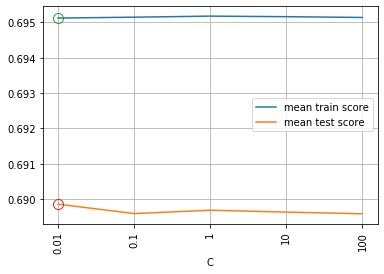

In [100]:
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_linear.shape[0]), result_svr_linear['param_C'], rotation = 90)
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_train_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_test_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

### SVR with Kernel 'Linear' Summary:

#### Train Score: 0.6947

#### Test Score: 0.6801

#### Best Parameters: {'C' : 0.01}

#### Best Cross - Validation Score: 0.6899

## SVR with Kernel 'Poly'

In [101]:
grid_parms_svrp = {'C': [1, 10, 100],'degree':[1,3]}

In [102]:
svr_poly = SVR(kernel='poly')
grid_svr_poly = GridSearchCV(estimator = svr_poly,param_grid = grid_parms_svrp,return_train_score=True,n_jobs= -1,cv=3)

In [103]:
grid_svr_poly.fit(X_train_pca,y_train)

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': [1, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [104]:
print("Best parameters: {}".format(grid_svr_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_poly.best_score_))
pd.DataFrame(grid_svr_poly.cv_results_)

Best parameters: {'C': 1, 'degree': 1}
Best cross-validation score: 0.6891


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.103663,0.035745,0.006615,0.001017,1,1,"{'C': 1, 'degree': 1}",0.682567,0.690655,0.694203,0.689142,0.004870,1,0.696395,0.696349,0.694592,0.695779,0.000839
1,0.368321,0.071603,0.011324,0.001241,1,3,"{'C': 1, 'degree': 3}",0.309821,0.318693,-0.029289,0.199742,0.161990,4,0.777762,0.766003,0.773397,0.772387,0.004853
2,0.620735,0.036334,0.007655,0.001224,10,1,"{'C': 10, 'degree': 1}",0.682022,0.690603,0.694161,0.688928,0.005095,3,0.696258,0.696298,0.694568,0.695708,0.000807
3,5.995787,0.264079,0.013313,0.001060,10,3,"{'C': 10, 'degree': 3}",-0.179353,-0.202416,-6.328244,-2.236671,2.893194,5,0.782029,0.773749,0.781357,0.779045,0.003755
4,4.937589,0.196495,0.008166,0.001453,100,1,"{'C': 100, 'degree': 1}",0.682338,0.690438,0.694228,0.689001,0.004959,2,0.696315,0.696262,0.694630,0.695736,0.000782
5,75.115580,1.994058,0.012173,0.002968,100,3,"{'C': 100, 'degree': 3}",-1.566335,-0.805437,-16.937669,-6.436480,7.431956,6,0.780452,0.773178,0.782151,0.778593,0.003892


In [105]:
svr_p = SVR(kernel='poly',C=100,degree = 1)
svr_p.fit(X_train_pca, y_train)
svr_p.score(X_train_pca, y_train)
svrp_test_score = svr_p.score(X_test_pca, y_test)
svrp_test_score

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

0.6948087842105182

0.6800778869836632

In [106]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_p, X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svr_p, X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Cross-validation scores:
[0.65721761 0.70856763 0.69712583 0.68597541 0.72571079 0.6630408 ]


C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

0.6896063446975841


In [107]:
result_svr_poly= pd.DataFrame(grid_svr_poly.cv_results_)
result_svr_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.103663,0.035745,0.006615,0.001017,1,1,"{'C': 1, 'degree': 1}",0.682567,0.690655,0.694203,0.689142,0.004870,1,0.696395,0.696349,0.694592,0.695779,0.000839
1,0.368321,0.071603,0.011324,0.001241,1,3,"{'C': 1, 'degree': 3}",0.309821,0.318693,-0.029289,0.199742,0.161990,4,0.777762,0.766003,0.773397,0.772387,0.004853
2,0.620735,0.036334,0.007655,0.001224,10,1,"{'C': 10, 'degree': 1}",0.682022,0.690603,0.694161,0.688928,0.005095,3,0.696258,0.696298,0.694568,0.695708,0.000807
3,5.995787,0.264079,0.013313,0.001060,10,3,"{'C': 10, 'degree': 3}",-0.179353,-0.202416,-6.328244,-2.236671,2.893194,5,0.782029,0.773749,0.781357,0.779045,0.003755
4,4.937589,0.196495,0.008166,0.001453,100,1,"{'C': 100, 'degree': 1}",0.682338,0.690438,0.694228,0.689001,0.004959,2,0.696315,0.696262,0.694630,0.695736,0.000782
5,75.115580,1.994058,0.012173,0.002968,100,3,"{'C': 100, 'degree': 3}",-1.566335,-0.805437,-16.937669,-6.436480,7.431956,6,0.780452,0.773178,0.782151,0.778593,0.003892


([<matplotlib.axis.XTick at 0x1ee50dba358>,
 <a list of 6 Text xticklabel objects>)

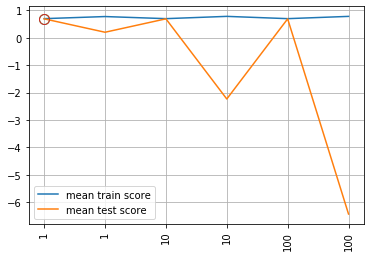

In [108]:
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_svr_poly['param_C'], rotation = 90)
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_train_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_test_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

### SVR with Kernel 'Poly' Summary:

#### Train Score: 0.6948

#### Test Score: 0.6801

#### Best Parameters: {'C': 1, 'degree': 1}

#### Best Cross - Validation Score: 0.6891

## SVR with Kernel 'rbf'

In [109]:
grid_parms_rbf = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}

In [110]:
svr_rbf = SVR(kernel='rbf')
grid_svr_rbf = GridSearchCV(estimator = svr_rbf,param_grid = grid_parms_rbf,return_train_score=True,n_jobs= -1,cv=3)

In [111]:
grid_svr_rbf.fit(X_train_pca,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [112]:
print("Best parameters: {}".format(grid_svr_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_rbf.best_score_))

Best parameters: {'C': 1, 'gamma': 0.1}
Best cross-validation score: 0.6637


In [113]:
svr_rbf = SVR(kernel='rbf',C=100,gamma=0.1)
svr_rbf.fit(X_train_pca, y_train)
svr_rbf.score(X_train_pca, y_train)
svr_rbf_test_score = svr_rbf.score(X_test_pca, y_test)
svr_rbf_test_score

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

0.8600747140301671

0.5393493958278313

In [114]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_rbf, X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svr_rbf, X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.61101697 0.62841202 0.59188209 0.58989257 0.59973473 0.59099321]
0.6019885963246779


In [115]:
result_rbf = pd.DataFrame(grid_svr_rbf.cv_results_)
result_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.058465,0.002525,0.014301,0.002612,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.643627,0.654478,0.647687,0.648597,0.004477,2,0.747270,0.747831,0.743444,0.746182,0.001950
1,0.092396,0.013784,0.030649,0.005806,0.1,1,"{'C': 0.1, 'gamma': 1}",0.077404,0.082293,0.067362,0.075686,0.006215,8,0.504675,0.493443,0.504388,0.500835,0.005228
2,0.112345,0.012555,0.022735,0.001225,0.1,10,"{'C': 0.1, 'gamma': 10}",-0.000727,-0.000383,-0.015475,-0.005528,0.007035,9,0.473397,0.454660,0.467935,0.465331,0.007868
3,0.159410,0.010241,0.050031,0.003737,0.1,100,"{'C': 0.1, 'gamma': 100}",-0.001676,-0.001624,-0.015465,-0.006255,0.006512,13,0.473200,0.454666,0.467520,0.465129,0.007753
4,0.118071,0.008566,0.014900,0.000826,1,0.1,"{'C': 1, 'gamma': 0.1}",0.658039,0.659721,0.673304,0.663688,0.006834,1,0.838128,0.846661,0.844749,0.843179,0.003656
5,0.108773,0.017845,0.027454,0.006283,1,1,"{'C': 1, 'gamma': 1}",0.125634,0.118724,0.127941,0.124100,0.003916,5,0.825999,0.829066,0.830193,0.828420,0.001772
6,0.112883,0.010936,0.026524,0.001792,1,10,"{'C': 1, 'gamma': 10}",-0.004696,-0.010390,-0.001677,-0.005588,0.003612,10,0.820707,0.825112,0.823968,0.823263,0.001866
7,0.197876,0.028126,0.066315,0.006267,1,100,"{'C': 1, 'gamma': 100}",-0.005696,-0.011553,-0.001930,-0.006393,0.003959,14,0.820812,0.825150,0.823991,0.823318,0.001834
8,0.255404,0.018097,0.017025,0.000821,10,0.1,"{'C': 10, 'gamma': 0.1}",0.611408,0.597553,0.641277,0.616746,0.018245,3,0.854408,0.864775,0.859809,0.859664,0.004234
9,0.106985,0.005939,0.025566,0.006514,10,1,"{'C': 10, 'gamma': 1}",0.125634,0.118724,0.127941,0.124100,0.003916,5,0.825999,0.829066,0.830193,0.828420,0.001772


([<matplotlib.axis.XTick at 0x1ee51ff8198>,
 <a list of 6 Text xticklabel objects>)

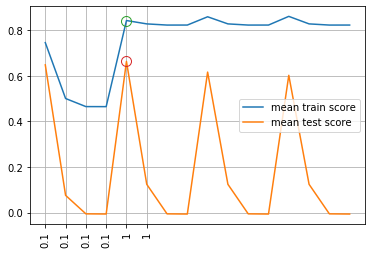

In [116]:
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_train_score'], label = 'mean train score')
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_rbf['param_C'], rotation = 90)
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_train_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_test_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

### SVR with Kernel 'rbf' Summary:

#### Train Score: 0.8601

#### Test Score: 0.5393

#### Best Parameters: {'C': 1, 'gamma': 0.1}

#### Best Cross - Validation Score: 0.6637

## Without PCA

In [117]:
d = {'Model': ['Linear Regression', 'KNN Regression','Ridge Regression','Lasso Regression',
               'Polynominal Regression','Simple SVR','SVR with Linear kernel','SVR with Poly kernel',
               'SVR with rbf kernel'], 
     'Cross-Validation Score':[0.711074, 0.550138, 0.709673, 0.601946, 0.709610, 0.706442, 0.711354, 0.737803,
                              0.742461]}

In [118]:
result = pd.DataFrame(data=d)
result

,Model,Cross-Validation Score
0,Linear Regression,0.711074
1,KNN Regression,0.550138
2,Ridge Regression,0.709673
3,Lasso Regression,0.601946
4,Polynominal Regression,0.709610
5,Simple SVR,0.706442
6,SVR with Linear kernel,0.711354
7,SVR with Poly kernel,0.737803
8,SVR with rbf kernel,0.742461


## Note : The above results are from Project 1 - Regression Task

## With PCA

In [119]:
result = {'Model': ['Linear Regression', 'KNN Regression','Ridge Regression','Lasso Regression',
                    'Polynominal Regression','Simple SVR','SVR with Linear kernel','SVR with Poly kernel',
                    'SVR with rbf kernel'],
          'Cross-Validation Score': [grid_search_lr.best_score_, grid_search_knn.best_score_, 
                                     grid_search_ridge.best_score_, grid_search_lasso.best_score_, 
                                     grid_poly.best_score_, grid_svrl.best_score_, grid_svr_linear.best_score_,
                                     grid_svr_poly.best_score_, grid_svr_rbf.best_score_]}

In [120]:
result = pd.DataFrame(data=result)
result

,Model,Cross-Validation Score
0,Linear Regression,0.689648
1,KNN Regression,0.625835
2,Ridge Regression,0.688463
3,Lasso Regression,0.668594
4,Polynominal Regression,0.707032
5,Simple SVR,0.686692
6,SVR with Linear kernel,0.689862
7,SVR with Poly kernel,0.689142
8,SVR with rbf kernel,0.663688


## We obtained better results with PCA for KNN Regression and Lasso Regression. Overall, it turns out to be almost same and not much of a difference after applying PCA.

## Deep Learning Model

In [121]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\dhurv\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [122]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\dhurv\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [123]:
# %matplotlib inline
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [124]:
X_train_nn = np.asarray(X_train_scale)
X_test_nn = np.asarray(X_test_scale)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [125]:
X_train_nn.shape

(1512, 14)

In [126]:
# step 1: build the model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 14, activation = 'relu'))
#hidden layer
model1.add(Dense(5, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))


# step 2: build the computational graph - compile
model1.compile(loss = 'mean_squared_error', optimizer = 'adam')

# step 3: train the model
model1.fit(X_train_nn, y_train, epochs = 1000, batch_size = 100)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/1000
1512/1512 [==============================] - 1s 449us/sample - loss: 0.0837
Epoch 2/1000
1512/1512 [==============================] - 0s 15us/sample - loss: 0.0692
Epoch 3/1000
1512/1512 [==============================] - 0s 18us/sample - loss: 0.0587
Epoch 4/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0514
Epoch 5/1000
1512/1512 [==============================] - 0s 23us/sample - loss: 0.0469
Epoch 6/1000
1512/1512 [==============================] - 0s 22us/sample - loss: 0.0435
Epoch 7/1000
1512/1512 [==============================] - 0s 22us/sample - loss: 0.0407
Epoch 8/1000
1512/1512 [==============================] - 0s 23us/sample - loss: 0.0382
Epoch 9/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0359
Epoch 10/1000
1512/1512 [==============================] - 0s 22us/sample - loss: 0.0338


1512/1512 [==============================] - 0s 12us/sample - loss: 0.0105
Epoch 90/1000
1512/1512 [==============================] - 0s 13us/sample - loss: 0.0105
Epoch 91/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0105
Epoch 92/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0104
Epoch 93/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0104
Epoch 94/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0104
Epoch 95/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0104
Epoch 96/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0104
Epoch 97/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0104
Epoch 98/1000
1512/1512 [==============================] - 0s 19us/sample - loss: 0.0104
Epoch 99/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0103
Epoch 100/1000
1512/1512 [=========

1512/1512 [==============================] - 0s 21us/sample - loss: 0.0095
Epoch 181/1000
1512/1512 [==============================] - 0s 22us/sample - loss: 0.0095
Epoch 182/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0095
Epoch 183/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0095
Epoch 184/1000
1512/1512 [==============================] - 0s 17us/sample - loss: 0.0095
Epoch 185/1000
1512/1512 [==============================] - 0s 24us/sample - loss: 0.0095
Epoch 186/1000
1512/1512 [==============================] - 0s 23us/sample - loss: 0.0095
Epoch 187/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0095
Epoch 188/1000
1512/1512 [==============================] - 0s 22us/sample - loss: 0.0095
Epoch 189/1000
1512/1512 [==============================] - 0s 17us/sample - loss: 0.0095
Epoch 190/1000
1512/1512 [==============================] - 0s 17us/sample - loss: 0.0094
Epoch 191/1000
1512/1512 

1512/1512 [==============================] - 0s 20us/sample - loss: 0.0090
Epoch 272/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0090
Epoch 273/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0090
Epoch 274/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0090
Epoch 275/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0090
Epoch 276/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0090
Epoch 277/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0090
Epoch 278/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0089
Epoch 279/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0089
Epoch 280/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0089
Epoch 281/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0089
Epoch 282/1000
1512/1512 

1512/1512 [==============================] - 0s 22us/sample - loss: 0.0086
Epoch 363/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0086
Epoch 364/1000
1512/1512 [==============================] - 0s 22us/sample - loss: 0.0086
Epoch 365/1000
1512/1512 [==============================] - 0s 24us/sample - loss: 0.0086
Epoch 366/1000
1512/1512 [==============================] - 0s 25us/sample - loss: 0.0086
Epoch 367/1000
1512/1512 [==============================] - 0s 22us/sample - loss: 0.0086
Epoch 368/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0086
Epoch 369/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0086
Epoch 370/1000
1512/1512 [==============================] - 0s 14us/sample - loss: 0.0086
Epoch 371/1000
1512/1512 [==============================] - 0s 19us/sample - loss: 0.0086
Epoch 372/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0086
Epoch 373/1000
1512/1512 

1512/1512 [==============================] - 0s 22us/sample - loss: 0.0084
Epoch 454/1000
1512/1512 [==============================] - 0s 23us/sample - loss: 0.0084
Epoch 455/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0084
Epoch 456/1000
1512/1512 [==============================] - 0s 19us/sample - loss: 0.0084
Epoch 457/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0084
Epoch 458/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0084
Epoch 459/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0084
Epoch 460/1000
1512/1512 [==============================] - 0s 19us/sample - loss: 0.0084
Epoch 461/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0084
Epoch 462/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0084
Epoch 463/1000
1512/1512 [==============================] - 0s 24us/sample - loss: 0.0084
Epoch 464/1000
1512/1512 

1512/1512 [==============================] - 0s 20us/sample - loss: 0.0083
Epoch 545/1000
1512/1512 [==============================] - 0s 16us/sample - loss: 0.0082
Epoch 546/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0082
Epoch 547/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0083
Epoch 548/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0083
Epoch 549/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0083
Epoch 550/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0083
Epoch 551/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0082
Epoch 552/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0082
Epoch 553/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0082
Epoch 554/1000
1512/1512 [==============================] - 0s 17us/sample - loss: 0.0082
Epoch 555/1000
1512/1512 

Epoch 635/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0082
Epoch 636/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0082
Epoch 637/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0082
Epoch 638/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0082
Epoch 639/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0081
Epoch 640/1000
1512/1512 [==============================] - 0s 18us/sample - loss: 0.0082
Epoch 641/1000
1512/1512 [==============================] - 0s 19us/sample - loss: 0.0081
Epoch 642/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0081
Epoch 643/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0081
Epoch 644/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0081
Epoch 645/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0081
Epoch 646/

1512/1512 [==============================] - 0s 20us/sample - loss: 0.0081
Epoch 727/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0081
Epoch 728/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0081
Epoch 729/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0081
Epoch 730/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0080
Epoch 731/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0080
Epoch 732/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0080
Epoch 733/1000
1512/1512 [==============================] - 0s 19us/sample - loss: 0.0080
Epoch 734/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0080
Epoch 735/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0081
Epoch 736/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0081
Epoch 737/1000
1512/1512 

1512/1512 [==============================] - 0s 20us/sample - loss: 0.0080
Epoch 818/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0080
Epoch 819/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0080
Epoch 820/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0080
Epoch 821/1000
1512/1512 [==============================] - 0s 19us/sample - loss: 0.0080
Epoch 822/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0080
Epoch 823/1000
1512/1512 [==============================] - 0s 22us/sample - loss: 0.0080
Epoch 824/1000
1512/1512 [==============================] - 0s 14us/sample - loss: 0.0080
Epoch 825/1000
1512/1512 [==============================] - 0s 15us/sample - loss: 0.0080
Epoch 826/1000
1512/1512 [==============================] - 0s 24us/sample - loss: 0.0080
Epoch 827/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0080
Epoch 828/1000
1512/1512 

1512/1512 [==============================] - 0s 20us/sample - loss: 0.0080
Epoch 909/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0079
Epoch 910/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0079
Epoch 911/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0080
Epoch 912/1000
1512/1512 [==============================] - 0s 18us/sample - loss: 0.0080
Epoch 913/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0080
Epoch 914/1000
1512/1512 [==============================] - 0s 22us/sample - loss: 0.0080
Epoch 915/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0080
Epoch 916/1000
1512/1512 [==============================] - 0s 20us/sample - loss: 0.0079
Epoch 917/1000
1512/1512 [==============================] - 0s 19us/sample - loss: 0.0079
Epoch 918/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0079
Epoch 919/1000
1512/1512 

Epoch 999/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0079
Epoch 1000/1000
1512/1512 [==============================] - 0s 21us/sample - loss: 0.0079


In [127]:
model1.evaluate(X_train_nn, y_train)

1512/1512 [==============================] - 0s 81us/sample - loss: 0.0079


0.0078816687707942

In [128]:
model1.evaluate(X_test_nn, y_test)

505/505 [==============================] - 0s 36us/sample - loss: 0.0141


0.014101203910932683